In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import random
import modules.clean_script
import modules.lines_to_txt
import os
import PIL

from modules.clean_script import clean_script
from modules.lines_to_txt import lines_to_txt
from os import path
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud, STOPWORDS

# force reload of custom modules
import importlib
importlib.reload(modules.clean_script);
importlib.reload(modules.lines_to_txt);

# set up logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
DATA_PATH = "data/lotr_dataset.csv"

script_df = pd.read_csv("data/lotr_scripts.csv")
char_df = pd.read_csv("data/lotr_characters.csv")

# Clean script from modules/clean_script.py
lotr_df, script_df, char_df = clean_script(script_df, char_df, out_path=DATA_PATH)

AttributeError: 'Series' object has no attribute 'isfloat'

In [4]:
def show_dialog(script, index=None, after=0):

    if index is None:
        random.randint(0, len(script))

    for i in range(after):
        char=script.iloc[index+i]["char"].upper()
        line=script.iloc[index+i]["dialog"]
        print(f"{char}:")
        print(f"{line}")

# show dialog:
show_dialog(lotr_df, random.randint(0, len(lotr_df)), 3)

ARAGORN:
Is there no other way?
GAMLING:
There is one passage. It leads into the mountains. But they will not get far. The Uruk-hai are too many.
ARAGORN:
Tell the women and children to make for the mountain pass. And barricade the entrance!


In [5]:
lines_per_char = lotr_df.char.value_counts().to_dict();
lines_per_race = lotr_df.race.value_counts().to_dict();
lines_per_gender = lotr_df.gender.value_counts().to_dict();

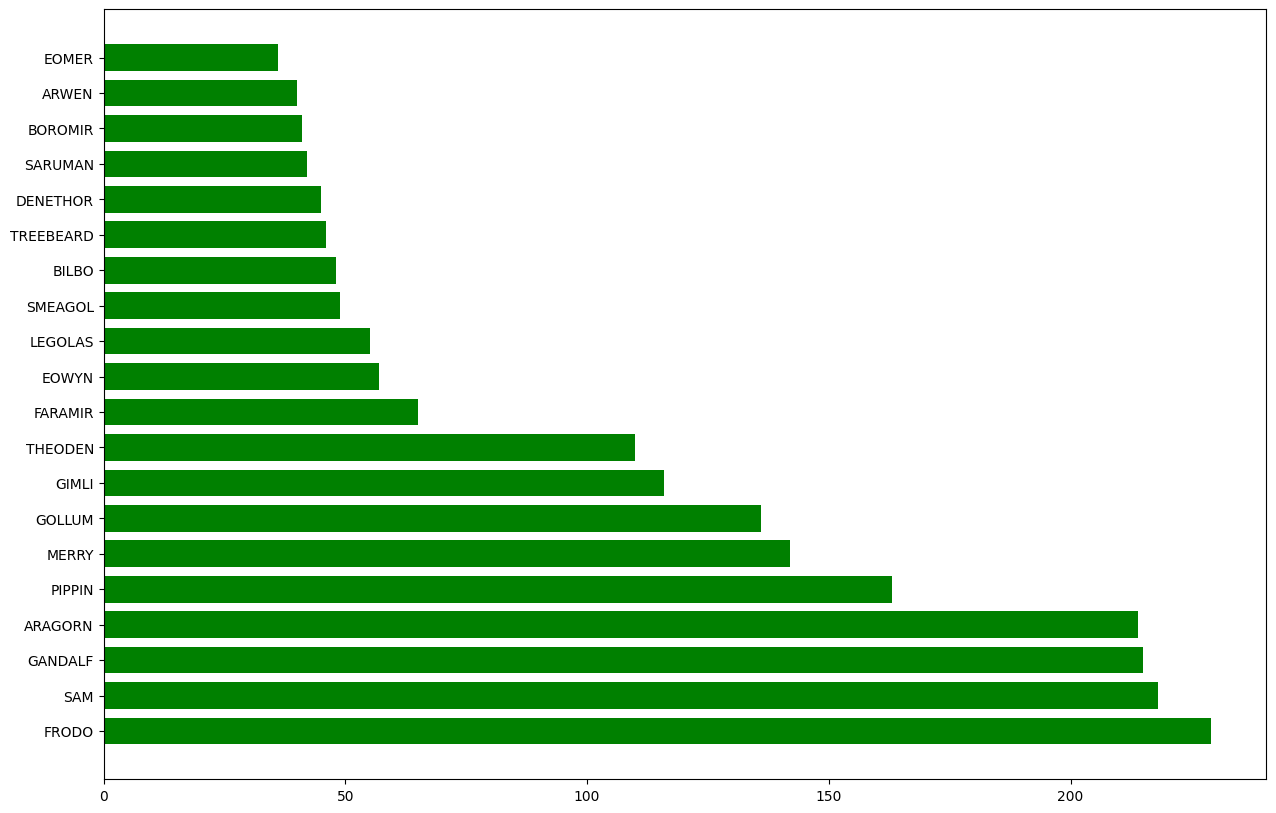

In [6]:
plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_per_char))[:20], list(lines_per_char.values())[:20], height=0.75, align='center', color='green');
plt.yticks(range(len(lines_per_char))[:20], list(lines_per_char.keys())[:20]);

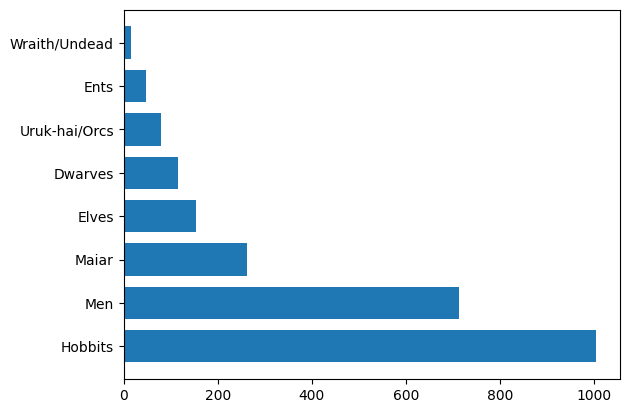

In [7]:
plt.barh(range(len(lines_per_race)), sorted(list(lines_per_race.values()), reverse=True), height=0.75, align='center');
plt.yticks(range(len(lines_per_race)), list(lines_per_race.keys()));

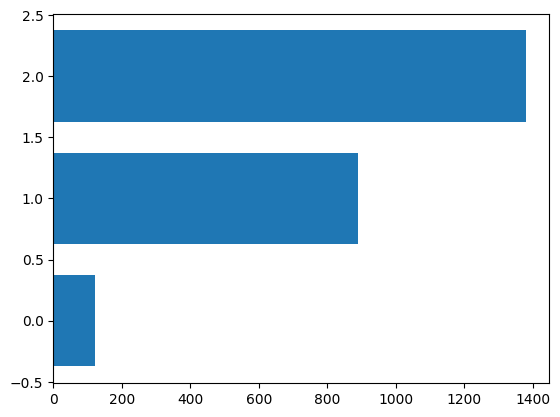

In [8]:
plt.barh(range(len(lines_per_gender))[:20], sorted(list(lines_per_gender.values())[:20], reverse=False), height=0.75, align='center');

In [35]:
#lines_to_txt(DATA_PATH);
lines_to_txt(DATA_PATH, char_name="FRODO");
lines_to_txt(DATA_PATH, char_name="GOLLUM");
lines_to_txt(DATA_PATH, char_name="SMEAGOL");
lines_to_txt(DATA_PATH);

Lines written to data/frodo_lines.txt
Lines written to data/gollum_lines.txt
Lines written to data/smeagol_lines.txt


TypeError: unsupported operand type(s) for +: 'float' and 'str'

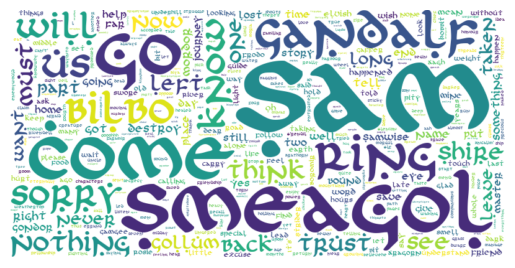

In [10]:
with open("data/frodo_lines.txt", "r") as f:
    text = f.read()

stopwords = set(STOPWORDS);
wc = WordCloud(max_words=2000, stopwords=stopwords, font_path='First Order.ttf',
               background_color="white", width=800, height=400);

# generate word cloud
wc.generate(text);

# show
plt.imshow(wc, interpolation='bilinear');
plt.axis("off");

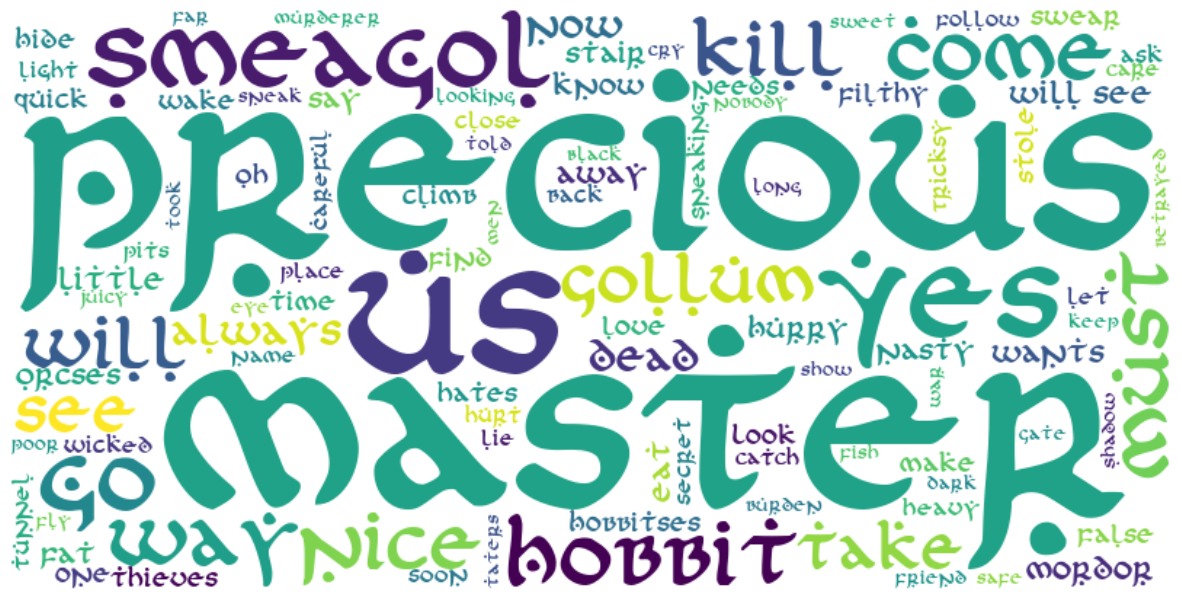

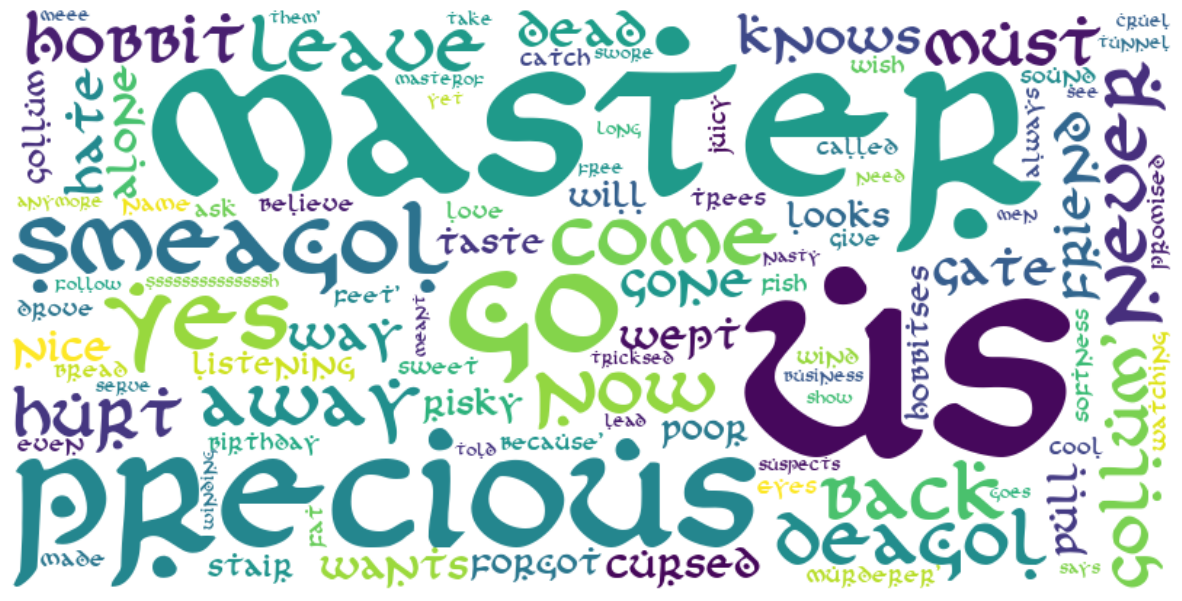

In [11]:
with open("data/gollum_lines.txt", "r") as f:
    text1 = f.read()

with open("data/smeagol_lines.txt", "r") as f:
    text2 = f.read()

stopwords = set(STOPWORDS);
wc1 = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=800, height=400);
wc2 = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=800, height=400);

# generate word cloud
wc1.generate(text1);
wc2.generate(text2);

# show
plt.figure(figsize=(15, 10));
plt.imshow(wc1, interpolation='bilinear');
plt.axis("off");

plt.figure(figsize=(15, 10));
plt.imshow(wc2, interpolation='bilinear');
plt.axis("off");

Number of lines per character
Number of lines per race
Number of lines per character per movie

Fix Gender on dataset
Then Lines per gender

Plot over image

Most common trigrams
Most common bigrams
Sentiment Analysis
gollum vs. smeagol wordcloud & sentiment

Transformer Race Text Classifier Model - using also the hobbit
LOTRGPT
First whole model Karpathy style then fine-tuning using GPT-2/BERT